In [68]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.scale as scale
import matplotlib.ticker as ticker

# https://chatgpt.com/c/67252220-492c-8006-9dba-30d1fbbb68db

# Physics rules
# Velocity as a function of time: v = at
#   velocity = acceleration * t  # m/s
# Force: F = m * a
#   force = mass * acceleration  # Newtons
# Power as a function of time: P = F * v
#   power = force * velocity  # Watts

# Physical inputs
mass = 100                      # kg - weight of the object to be moved
lift_amplitude = 0.1            # m - I want to lift 10cm
acceleration = 10               # m/s^2 (converted) - I want to lift at 10 m/s^2
freq = 10                       # Frequency in Hz - I want the position to be a square wave at 10Hz
max_power = 1000                # Watts available out of ideal motor

# Simulation parameters
duration = 2* 1/freq  # Duration in seconds
sampling_rate = 1000  # Sampling rate in Hz
time_step = 1/ sampling_rate
samples = int(duration*sampling_rate)

# Time range in seconds (0 to duration)
t = np.linspace(start = 0, stop = duration, num = samples, endpoint = True)

# Generate square wave of the desired position
#
# lift_amplitude        ________
#                       |      |
#                       |      |
# 0                -----        -----

ideal_position = np.zeros_like(t)       # Initialize ideal velocity array
for i in range(1, len(t)):
    ideal_position[i] = np.sign(np.sin(2 * np.pi * freq * t[i])) * lift_amplitude

# Simulation parameters
ideal_velocity = np.zeros_like(t)       # Initialize ideal velocity array
ideal_acceleration = np.zeros_like(t)   # Initialize ideal acceleration array
ideal_force = np.zeros_like(t)          # Initialize ideal force array
ideal_power  = np.zeros_like(t)         # Initialize ideal power array

actual_position = np.zeros_like(t)      # Initialize actual position array
actual_velocity = np.zeros_like(t)      # Initialize actual velocity array
actual_acceleration = np.zeros_like(t)  # Initialize actual acceleration array
actual_force = np.zeros_like(t)         # Initialize actual acceleration array
actual_power = np.zeros_like(t)         # Initialize actual acceleration array

# Iterate through each time step to simulate ideal position, velocity, acceleration & power
for i in range(1, len(t)):
    # Calculate the ideal velocity (based on desired square wave position change)
    ideal_velocity[i] = (ideal_position[i] - ideal_position[i-1]) * sampling_rate
    # Calculate the ideal acceleration (based on desired square wave velocity change)
    ideal_acceleration[i] = (ideal_velocity[i]-ideal_velocity[i-1])
    # Calculate the theoretical force required for this acceleration
    ideal_force[i] = mass * ideal_acceleration[i]
    # Calculate the theoretical power required P=F*v
    ideal_power[i] = ideal_force[i] * ideal_velocity[i]

# Iterate through each time step to simulate  position, velocity, acceleration & power under power limitation
for i in range(1, len(t)):
    # Work backwards with the limitation of power to calculate Force into Acceleration into Velocity into Postion

    # Limit the power to max_power (W) and recalculate force and acceleration
    if np.abs(ideal_power[i]) > max_power:
        actual_force[i] = np.sign(ideal_power[i]) * max_power / np.abs(actual_velocity[i - 1] + 1e-6)  # Adding a small term to avoid division by zero
    else:
        actual_force[i] = ideal_force[i]

    # Calculate limited acceleration based on the limited force (F=ma backwards a=F/m)
    actual_acceleration[i] = actual_force[i] / mass

    # Update velocity and position using the limited acceleration
    actual_velocity[i] = actual_velocity[i - 1] + actual_acceleration[i] * time_step
    actual_position[i] = actual_position[i - 1] + actual_velocity[i] * time_step

    # Calculate the theoretical power required P=F*v given the newly calculated step
    actual_power[i] = actual_force[i] * actual_velocity[i]

len(t)
ideal_velocity
ideal_acceleration


array([   0.,  100., -100.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0., -200.,  200.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,  200., -200.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,

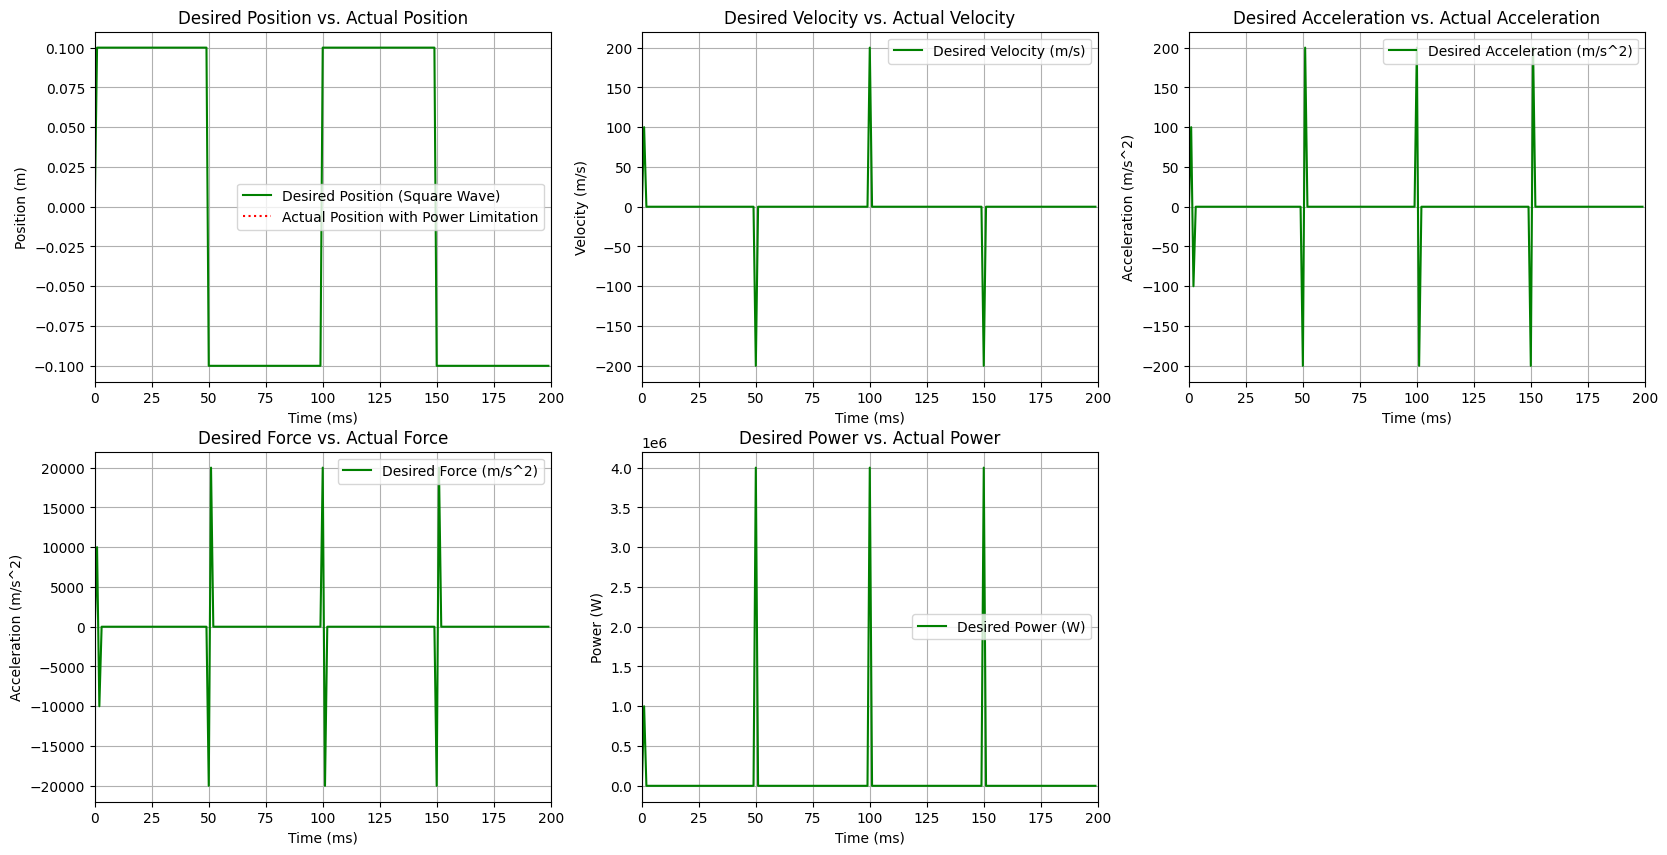

In [ ]:
# Plotting the desired and actual positions
plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
plt.title("Desired Position vs. Actual Position")
plt.plot(ideal_position, color='green', label="Desired Position (Square Wave)", scalex = False, scaley = False)
plt.plot(actual_position, color='red', label="Actual Position with Power Limitation", scalex = False, scaley = False, linestyle=':')
plt.xlim(0,len(t))  # 0..200
plt.xlabel("Time (ms)")
plt.ylim(-1.1*lift_amplitude,1.1*lift_amplitude)
plt.ylabel("Position (m)")
plt.legend()
plt.grid()

plt.subplot(2, 3, 2)
plt.title("Desired Velocity vs. Actual Velocity")
plt.plot(ideal_velocity, color='green', label="Desired Velocity (m/s)", scalex = False, scaley = True)
#plt.plot(actual_velocity, color='red', label="Actual Velocity (m/s) with Power Limitation", scalex = False, scaley = True, linestyle=':')
plt.xlim(0,len(t))  # 0..200
plt.xlabel("Time (ms)")
plt.ylabel("Velocity (m/s)")
plt.legend()
plt.grid()

plt.subplot(2, 3, 3)
plt.title("Desired Acceleration vs. Actual Acceleration")
plt.plot(ideal_acceleration, color='green', label="Desired Acceleration (m/s^2)", scalex = False, scaley = True)
#plt.plot(actual_acceleration, color='red', label="Actual Acceleration (m/s^2) with Power Limitation", scalex = False, scaley = True, linestyle=':')
plt.xlim(0,len(t))  # 0..200
plt.xlabel("Time (ms)")
# plt.ylim(-1.1*acceleration,1.1*acceleration)
plt.ylabel("Acceleration (m/s^2)")
plt.legend()
plt.grid()

plt.subplot(2, 3, 4)
plt.title("Desired Force vs. Actual Force")
plt.plot(ideal_force, color='green', label="Desired Force (m/s^2)", scalex = False, scaley = True)
#plt.plot(actual_force, color='red', label="Actual Force (m/s^2) with Power Limitation", scalex = False, scaley = True, linestyle=':')
plt.xlim(0,len(t))  # 0..200
plt.xlabel("Time (ms)")
plt.ylabel("Force (N)")
plt.legend()
plt.grid()

plt.subplot(2, 3, 5)
plt.title("Desired Power vs. Actual Power")
plt.plot(ideal_power, color='green', label="Desired Power (W)", scalex = False, scaley = True)
#plt.plot(actual_power, color='red', label="Actual Power (W) with Power Limitation", scalex = False, scaley = True, linestyle=':')
plt.xlim(0,len(t))  # 0..200
plt.xlabel("Time (ms)")
# plt.ylim(-0.1,1.1*max_power)
plt.ylabel("Power (W)")
plt.legend()
plt.grid()


# plt.tight_layout()
plt.show()